In [1]:
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import pandas as pd 

%matplotlib inline

2024-07-13 19:01:25.541789: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 19:01:25.548046: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 19:01:25.560106: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 19:01:25.583195: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 19:01:25.588879: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-13 19:01:25.607557: I tensorflow/core/platform/cpu_feature_gu

In [2]:
# Loading the dataset
data = mnist.load_data()

In [3]:
(X_train, y_train), (X_test, y_test) = data

In [4]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

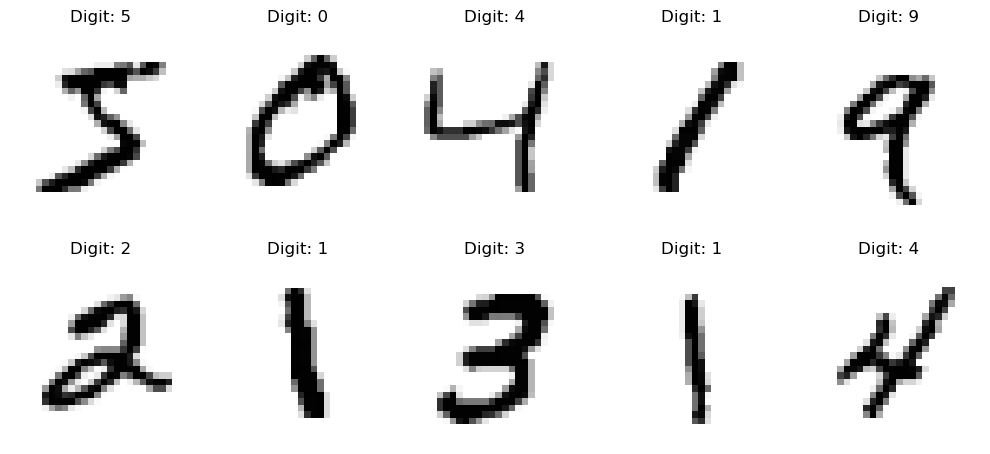

In [5]:
# Plotting the digits
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel() # Flatten the array to 1D

for i in range(10):
    axes[i].imshow(X_train[i], cmap=plt.cm.gray_r)
    axes[i].set_title(f"Digit: {y_train[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Checking the size of train dataset
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
# Checking the size of the test dataset
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

So the total of 70K images are divided into 9:1 ratio, meaning 90% of the total dataset is the training set and the rest 10% is test set.

We are going to use RandomForest Algorithm for the classification task

In [8]:
# To train the model, we need to reshape the datasets into 2D i.e. converting from (60000, 28, 28) to (60000, 784) [28*28]
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [9]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1) # By default n_estimators = 100

In [11]:
rf.fit(X_train_flat, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [12]:
rf_predictions = rf.predict(X_test_flat)

In [13]:
accuracy = accuracy_score(rf_predictions, y_test)
conf_matrix = confusion_matrix(rf_predictions, y_test)

In [14]:
print(f"Accuracy Socre: {accuracy}")

Accuracy Socre: 0.9704


In [15]:
conf_matrix

array([[ 971,    0,    6,    1,    1,    5,    7,    1,    4,    7],
       [   0, 1127,    0,    0,    0,    1,    3,    4,    0,    6],
       [   0,    2, 1002,    9,    0,    1,    0,   20,    6,    2],
       [   0,    2,    5,  972,    0,    9,    0,    2,    7,   12],
       [   0,    0,    3,    0,  955,    2,    3,    0,    5,   12],
       [   2,    1,    0,    9,    0,  860,    3,    0,    5,    1],
       [   3,    2,    3,    0,    5,    5,  937,    0,    5,    0],
       [   1,    0,    8,    9,    1,    2,    0,  989,    4,    4],
       [   3,    1,    5,    8,    4,    5,    5,    2,  930,    4],
       [   0,    0,    0,    2,   16,    2,    0,   10,    8,  961]])

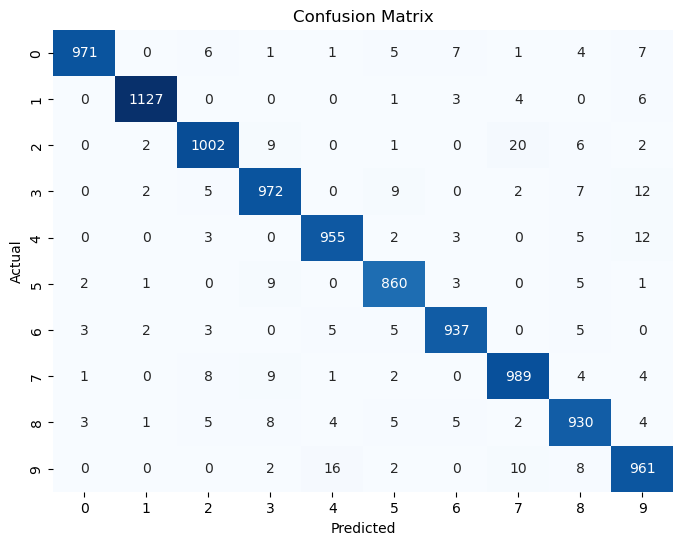

In [16]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Lets save the model locally
import joblib
import numpy as np
from PIL import Image, ImageOps

In [55]:
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [2]:
model = joblib.load('random_forest_model.pkl')

In [18]:
def preprocess_image(img_path):
    img = Image.open(img_path).convert("L")
    img = img.resize((28, 28))
    img = ImageOps.invert(img) # inverting the image (black background, white digit)
    img_array = np.array(img).reshape(1, -1)
    return img_array

In [25]:
def predict_digit(img_path):
    img_array = preprocess_image(img_path)
    pred = model.predict(img_array)[0]
    probs = model.predict_proba(img_array)[0]
    confidence = max(probs)*100
    return pred, confidence

In [26]:
pred, confidence = predict_digit('5.png')